# Simple Logistic Regression

In this example we consider the study done by Suzuki et al. (2006) where the authors consider the dependence of grain size of beach sand on the presence or absence of an endagered species of spiders. 

For the data, we have the size of the sand grains in mm and 0 denotes the absence of spiders and 1 denotes the presence of spiders.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Data 

In [2]:
a = np.array([0.245, 0.247, 0.285, 0.299, 0.327, 0.347, 0.356, 0.36, 0.363, 0.364, 0.398, 0.4, 0.409, 0.421, 0.432, 0.473, 0.509, 0.529, 0.561, 0.569, 0.594, 0.638, 0.656, 0.816, 0.853, 0.938, 1.036, 1.045])
y = np.array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

### Scatter plot the data.  

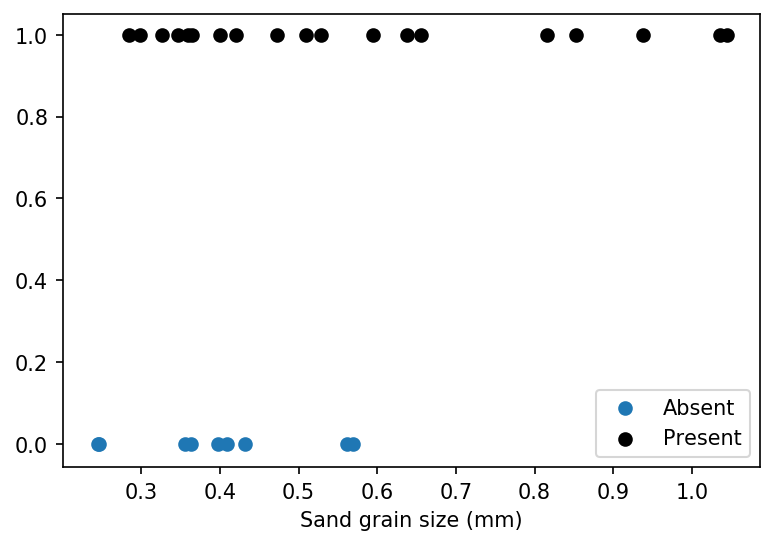

In [15]:
# Do some processing to get decent plots.
m = np.shape(a)[0]
num_ones = np.sum(y)
num_zeros = m - num_ones
a0 = np.zeros(num_zeros)
a1 = np.zeros(num_ones)
y0 = np.zeros(num_zeros)
y1 = np.ones(num_ones)
counter0 = 0
counter1 = 0
for i in range(m):
    if y[i] == 0:
        a0[counter0] = a[i]
        counter0 += 1
    else:
        a1[counter1] = a[i]
        counter1 += 1
        
plt.figure(dpi = 150)
plt.scatter(a0, y0, marker='o', label='Absent')
plt.scatter(a1, y1, marker='o', color='black', label='Present')
plt.xlabel('Sand grain size (mm)')
plt.legend()
plt.show()

To maximize the likelihood function, we have to solve the following optimization problem:

\begin{equation*}
    \min_{x_0, x_1}\prod_{i=1}^{m}\exp(y_i(x_0 + x_1a_i) - \log(1 + \exp(x_0 + x_1a_i))).
\end{equation*}

After taking the negative logarithm of the objective function, we obtain the following equivalent optimization problem:

\begin{equation*}
    \min_{x_0, x_1} \sum_{i=1}^{m}\log(1 + \exp(x_0 + x_1a_i)) - y_i(x_0 + x_1a_i).
\end{equation*}

The gradient of this function is 
\begin{equation*}
\nabla f = \begin{bmatrix}
\sum_{i=1}^{m}\frac{\exp(x_0 + x_1a_i)}{1 + \exp(x_0 + x_1a_i)} - y_i\\
a_i(\sum_{i=1}^{m}\frac{\exp(x_0 + x_1a_i)}{1 + \exp(x_0 + x_1a_i)} - y_i)
\end{bmatrix},
\end{equation*}

and is encoded in the following python function.

### We create a function that returns the gradient of the objective function that is obtained from the Likelihood maximization calculations.

In [37]:
def gradF(x):
    out = np.zeros(2)
    for i in range(m):
        out[0] += np.exp(x[0] + x[1]*a[i])/(1 + np.exp(x[0] + x[1]*a[i])) - y[i]
        out[1] += a[i]*(np.exp(x[0] + x[1]*a[i])/(1 + np.exp(x[0] + x[1]*a[i])) - y[i])
    return out

### Run the gradient descent algorithm 

In [45]:
start = np.array([1, 1]) # initial guess
alpha = 0.0001 # The learning rate

prev = start
final = start - alpha*gradF(start)
while (np.linalg.norm(prev - final) > 1e-6):
    prev = final
    final = final - alpha*gradF(final)

### Final Plot

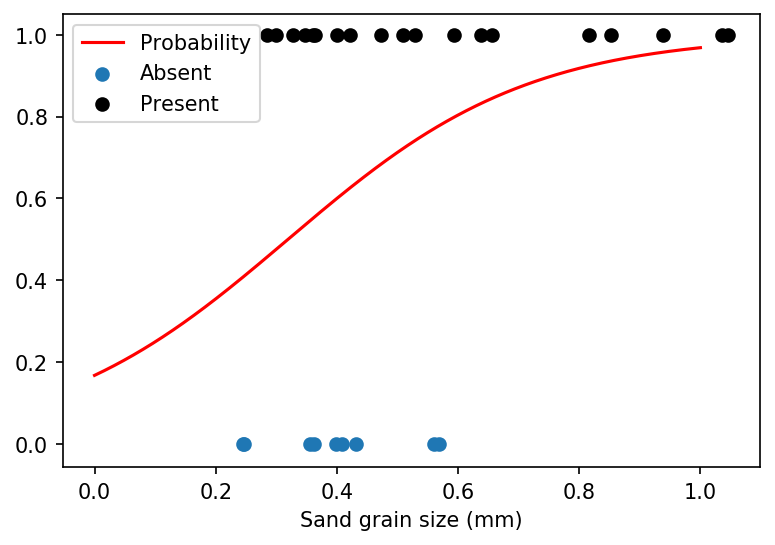

In [49]:
x = np.linspace(0, 1, 1000)
p = np.array([np.exp(final[0] + final[1]*x[i])/(1 + np.exp(final[0] + final[1]*x[i])) for i in range(1000)])
plt.figure(dpi = 150)
plt.scatter(a0, y0, marker='o', label='Absent')
plt.scatter(a1, y1, marker='o', color='black', label='Present')
plt.plot(x, p, color='red', label='Probability')
plt.xlabel('Sand grain size (mm)')
plt.legend()
plt.show()

**Reference**: *Suzuki, S., N. Tsurusaki, and Y. Kodama. 2006. Distribution of an endangered burrowing spider Lycosa ishikariana in the San'in Coast of Honshu, Japan (Araneae: Lycosidae). Acta Arachnologica 55: 79-86.*